<div align="center">
 <font size="5" > **基于机器学习的工程机械设备故障预测系统Part3 - 测试集Leak**</font>
</div>






在前两章，我们给出了针对该竞赛常见的分析于可视化的方法以及根据我们的EDA如何进行特征工程,设计验证集,并通过结合规则&模型得到一个非常好的成绩。

在本篇文章中，我们介绍一种探索测试集label的方法,虽然很少会碰到,但是也是作为数据竞赛者一种必备的直觉,也有必要了解一下。


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Leak-观测" data-toc-modified-id="Leak-观测-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Leak 观测</a></span><ul class="toc-item"><li><span><a href="#测试集观察-&amp;-预测(线上1.0)" data-toc-modified-id="测试集观察-&amp;-预测(线上1.0)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>测试集观察 &amp; 预测(线上1.0)</a></span></li><li><span><a href="#根据群友给的每个单独的结果计算的值计算出所有的label的个数" data-toc-modified-id="根据群友给的每个单独的结果计算的值计算出所有的label的个数-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>根据群友给的每个单独的结果计算的值计算出所有的label的个数</a></span><ul class="toc-item"><li><span><a href="#模型提交" data-toc-modified-id="模型提交-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>模型提交</a></span></li></ul></li></ul></li><li><span><a href="#小结" data-toc-modified-id="小结-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>小结</a></span></li></ul></div>

# Leak 观测
## 测试集观察 & 预测(线上1.0)

我们发现我们的预测结果存在非常大的规律，有极大的聚类情况，1182分布在最下面,1141除了5%不到的分布在了10000附近，95%都分布在后半段;1239在1141前面一点，1174因为没有出现在我们的预测中，我们随机将其放到最后。

![](./pic/suspect.png)


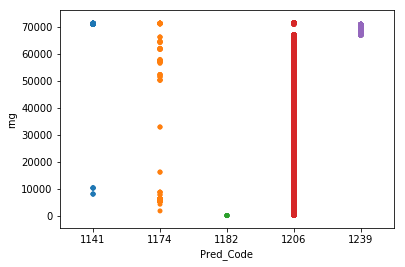

In [39]:
sns.stripplot(x="Pred_Code", y="rng", data=test_data);

- 数量太少了，可能算错了，大部分还是分布在后面

In [40]:
test_data.loc[((test_data.Pred_Code == 1141) & (test_data.rng <= 20000))].shape

(8, 16)

## 根据群友给的每个单独的结果计算的值计算出所有的label的个数

按照下面的方法进行排序！

- 1182： 6个(最前面6个,杰神朋友给的)
- 1206： 67048个
- 1239： 3952个
- 1141： 431个 最后122个往前瞬移
- 1174： 最后122个

In [48]:
from sklearn.metrics import f1_score  
test_data['SPN_FMI_Code'] = 1206
test_data.iloc[:6]['SPN_FMI_Code'] = 1182
test_data.iloc[6:6+67048]['SPN_FMI_Code'] = 1206
test_data.iloc[6 + 67048 : 6 + 67048 + 3952]['SPN_FMI_Code'] = 1239
test_data.iloc[6 + 67048 + 3952:6 + 67048 + 3952 + 431]['SPN_FMI_Code'] = 1141
test_data.iloc[6 + 67048 + 3952+ 431:]['SPN_FMI_Code'] = 1174  

In [46]:
test_data['SPN_FMI_Code'] = 1206
test_data.ix[:6]['SPN_FMI_Code'] = 1182
test_data.ix[6:6+67048,'SPN_FMI_Code'] = 1206
test_data.ix[6 + 67048 : 6 + 67048 + 3952,'SPN_FMI_Code'] = 1239
test_data.ix[6 + 67048 + 3952:6 + 67048 + 3952 + 431,'SPN_FMI_Code'] = 1141
test_data.ix[6 + 67048 + 3952+ 431:,'SPN_FMI_Code'] = 1174  

In [49]:
test_data['SPN_FMI_Code'].value_counts()

1206    67048
1239     3952
1141      431
1174      122
1182        6
Name: SPN_FMI_Code, dtype: int64

### 模型提交

In [50]:
test_data['Pred'] = test_data['SPN_FMI_Code'].values
test_data[['idx','Pred']].to_csv('1.csv',index =None)

In [51]:
test_data['Pred'].value_counts()

1206    67048
1239     3952
1141      431
1174      122
1182        6
Name: Pred, dtype: int64

# 小结

通过观察测试集的预测分布，有的时候我们可以抓住出题方因为一些细节原因造成的leak,不过因为此次比赛后来又重新进行了复赛，复赛中leak被修复了，但是这种对于测试预测的观察还是一种很有趣的发现。

数据竞赛很多时候还是看线上得分的,对训练集&验证集的探索是必备的，但是很多时候对测试集的预测进行某种程度的分析,往往也会有意想不到的收获。
